In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

In [2]:
data = pd.read_csv('3.01. Country Clusters.csv')

In [3]:
data

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,English
1,Canada,62.40,-96.80,English
2,France,46.75,2.40,French
3,UK,54.01,-2.53,English
4,Germany,51.15,10.40,German
5,Australia,-25.45,133.11,English


In [4]:
# plotting the data in the graph as scatter ploot

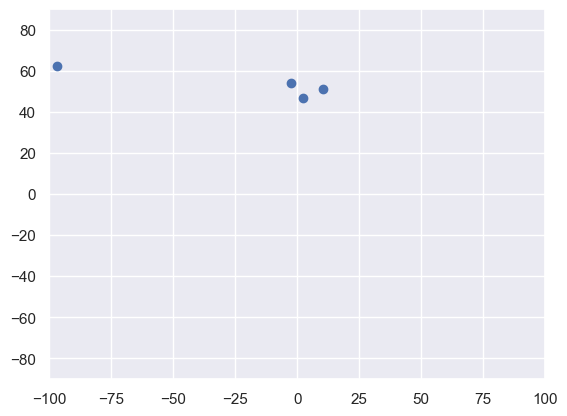

In [5]:
plt.scatter(data['Longitude'],data['Latitude']) # plotting longitude and latitude of countries
plt.xlim(-100,100) # then giving general longitude and latitude maximum limit 
plt.ylim(-90,90)
plt.show()
# see the country coordinate is placed like it is in world map-

In [6]:
# inoc method of pandas selects rows and colums in the datasetr
# basically all the data as : and slicing out first and last leaving middle two red color marked data only
# no limits for rows but slice out others from data
x = data.iloc[:,1:3]

In [7]:
#  k means clustering with two clusters
k_means = KMeans(4)

In [8]:
# clustering results
identified_clusters = k_means.fit_predict(x)
identified_clusters

array([3, 1, 2, 2, 2, 0], dtype=int32)

In [9]:
data_with_clusters = data.copy()

In [10]:
# appending wnoter feature to the dataset
data_with_clusters['Cluster'] = identified_clusters

In [11]:
data_with_clusters


,Country,Latitude,Longitude,Language,Cluster
0,USA,44.97,-103.77,English,3
1,Canada,62.40,-96.80,English,1
2,France,46.75,2.40,French,2
3,UK,54.01,-2.53,English,2
4,Germany,51.15,10.40,German,2
5,Australia,-25.45,133.11,English,0


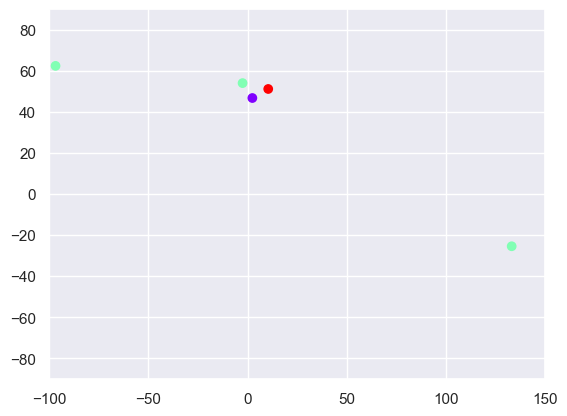

In [31]:
plt.scatter(data_with_clusters['Longitude'], data_with_clusters['Latitude'], c=data_with_clusters['Cluster'], cmap='rainbow')
plt.xlim(-100,150)
plt.ylim(-90,90)
plt.show()
# the only two colo inspite of four clusters is because there is overlapping of datapoints

# WCSS

In [34]:
k_means.inertia_

0.0

In [45]:
# looping through the elements with number of elements times until we get the optimal cluster
# here we are filling wcss withh amount of clusters we get in each iteration

wcss=[]
for i in range(1,7):
    # testing kmeans with multiple value of clusters 
    k_means = KMeans(i)
    k_means.fit(x)
    # taking the inertia (WCSS)  each iteraytion 
    wcss_iteration = k_means.inertia_
    # appending with wcss values each numer of clusters
    wcss.append(wcss_iteration)

In [41]:
wcss

[42601.91356666667,
 13205.758119999999,
 288.10523333333333,
 214.69914999999995,
 38.50624999999998,
 0.0]

In [42]:
number_of_cluster = range(1,7)

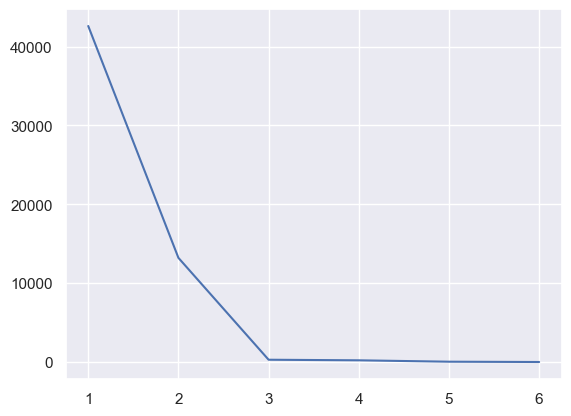

In [46]:
# plotting the iteration(number of clusters we created  
# and wcss distance each value generating elbow type fiture)
plt.plot(number_of_cluster, wcss)

In [47]:
# interpretting the graph we see that 3 is optimal where 2 is sub optimal so 3 4 5 6 has same wcss so any o fthem will works